In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("audmind_full.csv")
df.head()

,file_id,text,Question,Answer,Reasoning
0,0Ak1EonaL7g_chunk1_data1_task3,"Debra, when we spoke on the phone during the ...",What is the stress cause here?,This patient shows the stress cause related to...,The patient refers to a conversation with Debr...
1,0Ak1EonaL7g_chunk1_data2_task3,Thank you. You certainly sound annoyed even ...,What is the stress cause here?,This patient shows the stress cause related to...,The patient acknowledges a perception of annoy...
2,0Ak1EonaL7g_chunk2_data1_task3,what's the reason that she's asked you to com...,What is the stress cause here?,This patient shows the stress cause related to...,The text expresses a question about someone el...
3,0Ak1EonaL7g_chunk4_data1_task3,Yeah. she said that I was being too aggressi...,What cause of depression does this show?,This patient shows causes of depression relate...,The patient expresses frustration about being ...
4,0Ak1EonaL7g_chunk7_data1_task1,"I don't know. I don't know, I don't know, ma...",Does the patient suffer from stress?,"Yes, the patient suffers from stress.",The patient expresses feelings of anxiety rela...


In [5]:
df['task_no'] = df['file_id'].str.extract(r'task(\d+)')

In [6]:
df['task_no'] = df['task_no'].astype(int)

df1 = df[df['task_no'] == 1]
df2 = df[df['task_no'] == 2]
df3 = df[df['task_no'] == 3]
df4 = df[df['task_no'] == 4]

In [7]:
t1_question = df1['Question'].unique()
t2_question = df2['Question'].unique()
t3_question = df3['Question'].unique()
t4_question = df4['Question'].unique()

### 1. Binary mental health detection

In [8]:
t1_question

array(['Does the patient suffer from stress?',
       'Does the patient suffer from loneliness?',
       'Does the patient suffer from depression?'], dtype=object)

### 2. Multi-class mental health detection
#### can it be renamed as Disorder Symptom Explanation?

In [9]:
t2_answer = df2['Answer'].unique().tolist()

In [21]:
t2_question

array(['What mental disorder symptoms does the patient show?',
       'What mental disorder does this person show?',
       'What mental disorder symptoms does this patient show?'],
      dtype=object)

In [20]:
len(t2_answer)

2298

In [11]:
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

/data/amey_2311cs10/anaconda3/envs/condapy312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
tqdm.pandas()
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode all answers at once with a single progress bar
answers = df2['Answer'].tolist()
embeddings = model.encode(answers, show_progress_bar=True)

# Run clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df2['cluster'] = kmeans.fit_predict(embeddings)

Batches: 100%|████████████████████████████████████████████████████████████████████████| 142/142 [00:01<00:00, 89.47it/s]
/tmp/ipykernel_2068698/11921710.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = kmeans.fit_predict(embeddings)


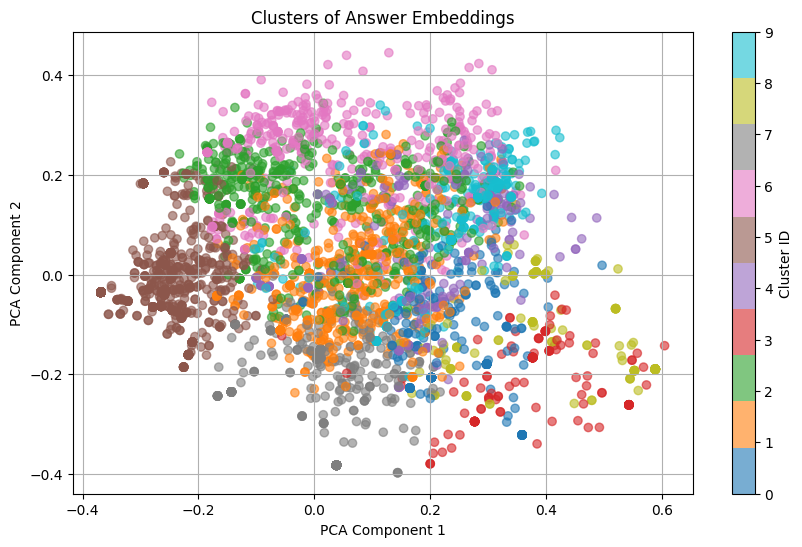

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1],
                      c=df2['cluster'], cmap='tab10', alpha=0.6)
plt.title('Clusters of Answer Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()

### 3. Mental health cause/ factor detection
#### can it be renamed as Cause Explaination?

In [23]:
t3_question

array(['What is the stress cause here?',
       'What cause of depression does this show?',
       'What is the cause of stress?',
       'What is the cause of stress here?'], dtype=object)

In [24]:
t3_answer = df3['Answer'].unique().tolist()

In [26]:
len(t3_answer)

1659

### 4. Mental risk/ wellness factors detection

In [27]:
t4_question

array(['Does the social wellness dimension exist here?',
       'Does the emotional wellness dimension exist here?',
       'Does the patient show risk of perceived burdensomeness?',
       'Does the vocational wellness dimension exist here?',
       'Does the intellectual wellness dimension exist here?',
       'Does the patient show risk of thwarted belongingness?',
       'Does the physical wellness dimension exist here?'], dtype=object)

In [33]:
t4_answer = df4['Answer'].unique().tolist()
len(t4_answer)

5

In [34]:
t4_question.tolist()

['Does the social wellness dimension exist here?',
 'Does the emotional wellness dimension exist here?',
 'Does the patient show risk of perceived burdensomeness?',
 'Does the vocational wellness dimension exist here?',
 'Does the intellectual wellness dimension exist here?',
 'Does the patient show risk of thwarted belongingness?',
 'Does the physical wellness dimension exist here?']